#Computing in Context
##Social Science Track
##Lecture the Fifth, in which we briefly explore
##Networks

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 8)


for a fine tutorial, from which I'm showing slides, see 
http://www.scottbot.net/HIAL/?page_id=41142


And for an example, https://www.academia.edu/2153390/The_Social_Network_of_Alexander_the_Great_Social_Network_Analysis_in_Ancient_History

##How to represent networks with numbers


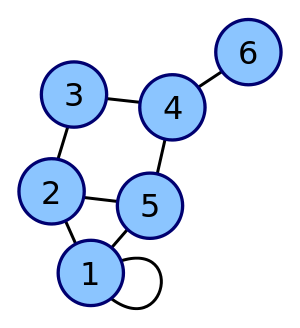

In [2]:
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/6n-graph2.svg/300px-6n-graph2.svg.png")
###h/t wikipedia

##A long way

1 IS CONNECTED TO 1

1 IS CONNECTED TO 2

1 IS CONNECTED TO 5

2 IS CONNECTED IS 1

. . . .

##adjacency matrix
$\begin{pmatrix}
1 & 1 & 0 & 0 & 1 & 0\\
1 & 0 & 1 & 0 & 1 & 0\\
0 & 1 & 0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 & 1 & 1\\
1 & 1 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0\\
\end{pmatrix}$

A $1$ at column $i$ and row $j$ means that $i$ and $j$ are connected. 

$6$ is connected only to $4$; $1$ is connected to itself, $2$, and $5$.

This graph is *symmetric*: it assumes a connection from $1$ to $2$ is the same as one from $2$ to $1$. 

Often this is **not** the case: think of friending someone on a social network: A friending B does not mean B friends A. Such a graph is called a *directed* graph. 


#An example: membership in patriotic clubs

I'm taking this example from http://kieranhealy.org/blog/archives/2013/06/09/using-metadata-to-find-paul-revere/ and moving it from `R` to `python`

In [2]:
membership_matrix=pd.read_csv("https://raw.githubusercontent.com/kjhealy/revere/master/data/PaulRevereAppD.csv", index_col=[0])

In [3]:
membership_matrix

,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
Adams.John,0,0,1,1,0,0,0
Adams.Samuel,0,0,1,1,0,1,1
Allen.Dr,0,0,1,0,0,0,0
Appleton.Nathaniel,0,0,1,0,0,1,0
Ash.Gilbert,1,0,0,0,0,0,0
Austin.Benjamin,0,0,0,0,0,0,1
Austin.Samuel,0,0,0,0,0,0,1
Avery.John,0,1,0,0,0,0,1
Baldwin.Cyrus,0,0,0,0,0,0,1
Ballard.John,0,0,1,0,0,0,0


In [4]:
membership_matrix.shape

(254, 7)

We have a matrix of 254 rows and 7 columns

##discerning connections!

We are intested in 

- who is connected to whom

- which organization most connected to which other organization.

Our quarry is something like the *similarity matrices* we looked at in doing our work with text.

We are going to create an *adjacency matrix*, another square matrix that indicates who is connected to whom.

###a little more matrix math
(You are not responsible for this but I want you to know the smoke and mirrors.)

We have to do a little of basic arithmetic with matrices to make this work.

First we need the idea of the transpose, which is just flipping the rows and columns of a matrix.

$\begin{bmatrix}
1 & 2  \\
3 & 4 \end{bmatrix}^{\mathrm{T}}
=
\begin{bmatrix}
1 & 3  \\
2 & 4 \end{bmatrix}$

The *adjacency* matrix is the product of a matrix and its transpose.

Say we have a $257 * 7$ matrix; its transpose will be $7 * 257$ matrix.

If we multiply an $M * N$ matrix by an $N * M$ matrix, we get a $M * M$ matrix.


So let's start with the adjacency of every *person* to every other person.

Our goal, then, is a symmetrical matrix that matches $M$ people to $M$ people.

In python we can use the `.dot` method to perform the necessary form of matrix multiplication. We can do this directly on `pandas` dataframes.

In [5]:
person_adjacency=membership_matrix.dot(membership_matrix.T)
# multiplying the membership matrix by its transpose

In [6]:
person_adjacency

,Adams.John,Adams.Samuel,Allen.Dr,Appleton.Nathaniel,Ash.Gilbert,Austin.Benjamin,Austin.Samuel,Avery.John,Baldwin.Cyrus,Ballard.John,...,Whitwell.William,Williams.Jeremiah,Williams.Jonathan,Williams.Thomas,Willis.Nathaniel,Wingfield.William,Winslow.John,Winthrop.John,Wyeth.Joshua,Young.Thomas
Adams.John,2,2,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
Adams.Samuel,2,4,1,2,0,1,1,1,1,1,...,1,0,1,0,0,0,1,2,0,2
Allen.Dr,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
Appleton.Nathaniel,1,2,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2
Ash.Gilbert,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Austin.Benjamin,0,1,0,0,0,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,0
Austin.Samuel,0,1,0,0,0,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,0
Avery.John,0,1,0,0,0,1,1,2,1,0,...,1,0,1,0,0,0,0,1,0,0
Baldwin.Cyrus,0,1,0,0,0,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,0
Ballard.John,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


Just as easily we can get the adjacency among the clubs.

This time we multipy the transpose by the original matrix.

(Remember: matrix multiplication is **not** commutative.)

In [7]:
club_adjacency=membership_matrix.T.dot(membership_matrix)

In [8]:
club_adjacency

,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
StAndrewsLodge,53,2,3,2,3,1,3
LoyalNine,2,10,3,0,2,0,3
NorthCaucus,3,3,59,5,13,9,16
LongRoomClub,2,0,5,17,2,5,5
TeaParty,3,2,13,2,97,3,8
BostonCommittee,1,0,9,5,3,21,11
LondonEnemies,3,3,16,5,8,11,62


In [9]:
club_adjacency["StAndrewsLodge"]

StAndrewsLodge     53
LoyalNine           2
NorthCaucus         3
LongRoomClub        2
TeaParty            3
BostonCommittee     1
LondonEnemies       3
Name: StAndrewsLodge, dtype: int64

In [10]:
[value for value in club_adjacency["StAndrewsLodge"]]

[53, 2, 3, 2, 3, 1, 3]

In [11]:
club_adjacency_names=[club for club in club_adjacency]

#Python package for networks: `networkx`


In [12]:
import networkx as nx

introduces new data type, the graph, with lots of operations to create, modify, analyze, graph, import and export graphs

find the full documentation at 
https://networkx.github.io/


Begin by initializing a graph, then add edges, nodes or both.


In [13]:
my_first_graph=nx.Graph() # initialize a graph

In [14]:
my_first_graph.add_edge(1,2)

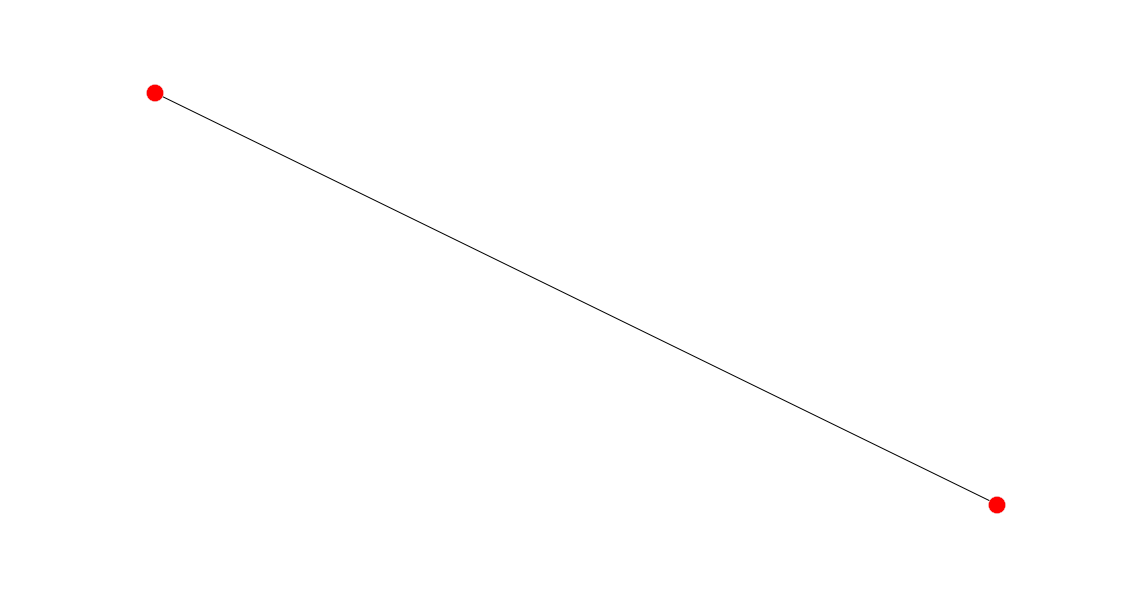

In [15]:
nx.draw(my_first_graph)

In [16]:
my_first_graph.add_edges_from([(2,3), (2,4)])  #add a list of edges, in the form of tuples (x,y)

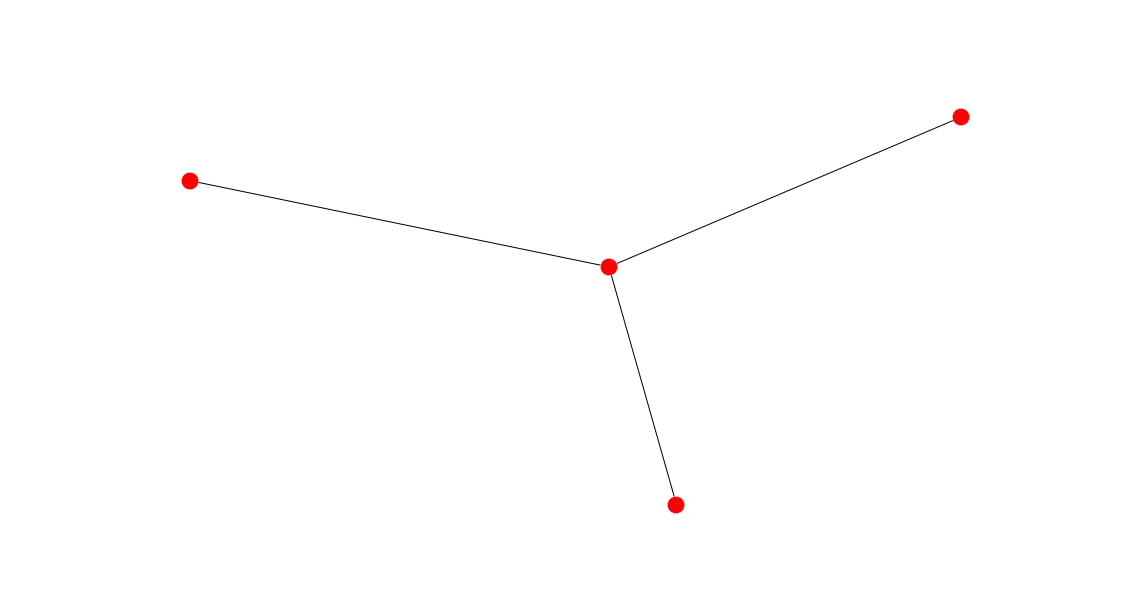

In [17]:
nx.draw(my_first_graph)

In [18]:
nx.number_of_nodes(my_first_graph)

4

In [19]:
my_first_graph.nodes()

[1, 2, 3, 4]

In [20]:
my_first_graph.edges()

[(1, 2), (2, 3), (2, 4)]

In [21]:
nx.betweenness_centrality(my_first_graph)

{1: 0.0, 2: 1.0, 3: 0.0, 4: 0.0}

### Both nodes and edges can have additional attributes

most important for us is "weight": how *strong* a connection between two nodes


In [22]:
my_first_graph.add_edge(4,5, weight=3)

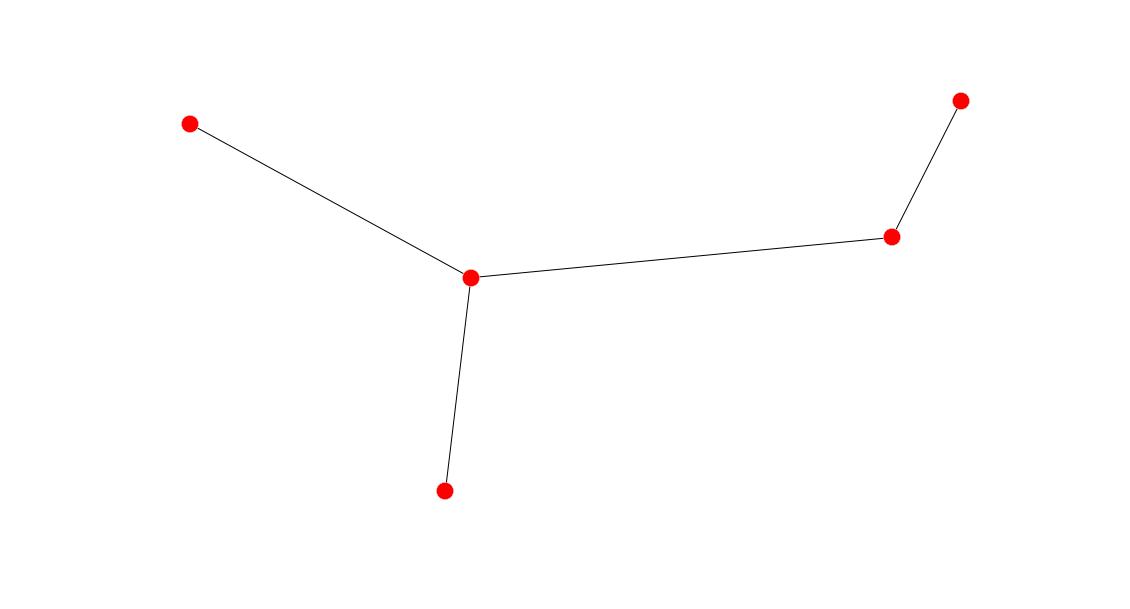

In [23]:
nx.draw(my_first_graph)

Default simply graphing method *not* show the weighted edge.

We will fix this.

For examples of drawing in `networkx`, see https://networkx.github.io/documentation/latest/gallery.html

In [24]:
G=nx.Graph()

In [36]:
G=nx.to_networkx_graph(club_adjacency.values)

In [40]:
G.nodes()

[0, 1, 2, 3, 4, 5, 6]

In [42]:
[G[node]=club_adjacency_names[node] for node in G.nodes()]

SyntaxError: invalid syntax (<ipython-input-42-8b117873d460>, line 1)

In [26]:
for club in club_adjacency:
  for i, j in enumerate(club_adjacency[club]):
    G.add_edge(club, club_adjacency_names[i], weight=j) 

In [35]:
pos=nx.spring_layout(G,iterations=20)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()


AttributeError: 'str' object has no attribute 'get'

In [28]:
H=nx.Graph()

In [29]:
person_adjacency_names=[person for person in person_adjacency]
for person in person_adjacency:
  for i, j in enumerate(person_adjacency[person]):
    if person != person_adjacency_names[i]:
        H.add_edge(person, person_adjacency_names[i], weight=j) 

In [30]:
H=nx.to_networkx_graph(person_adjacency.values)

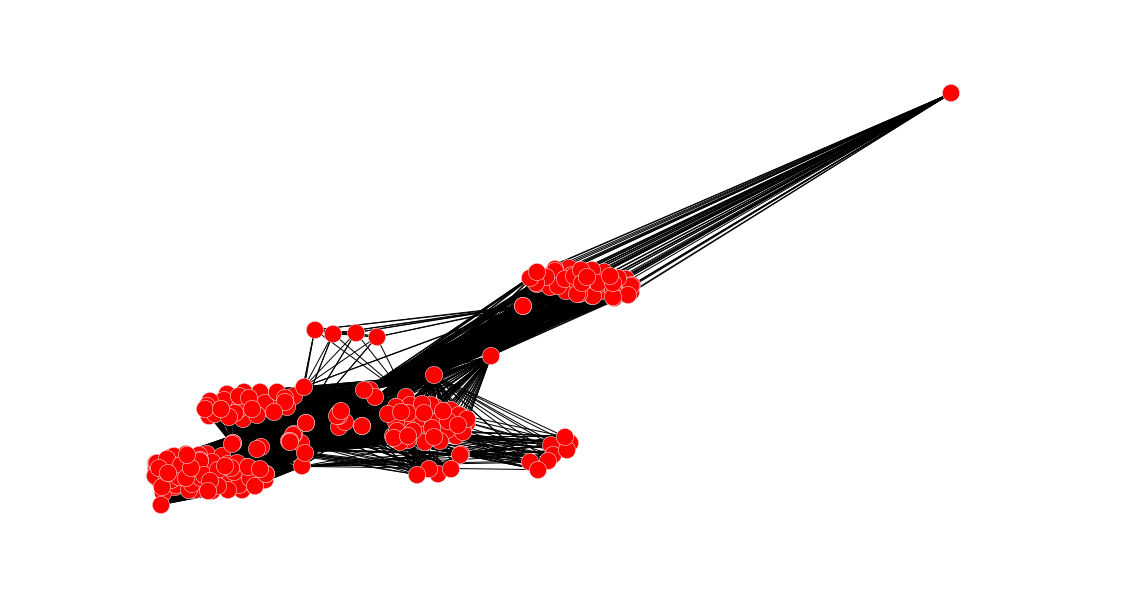

In [31]:
nx.draw(H)

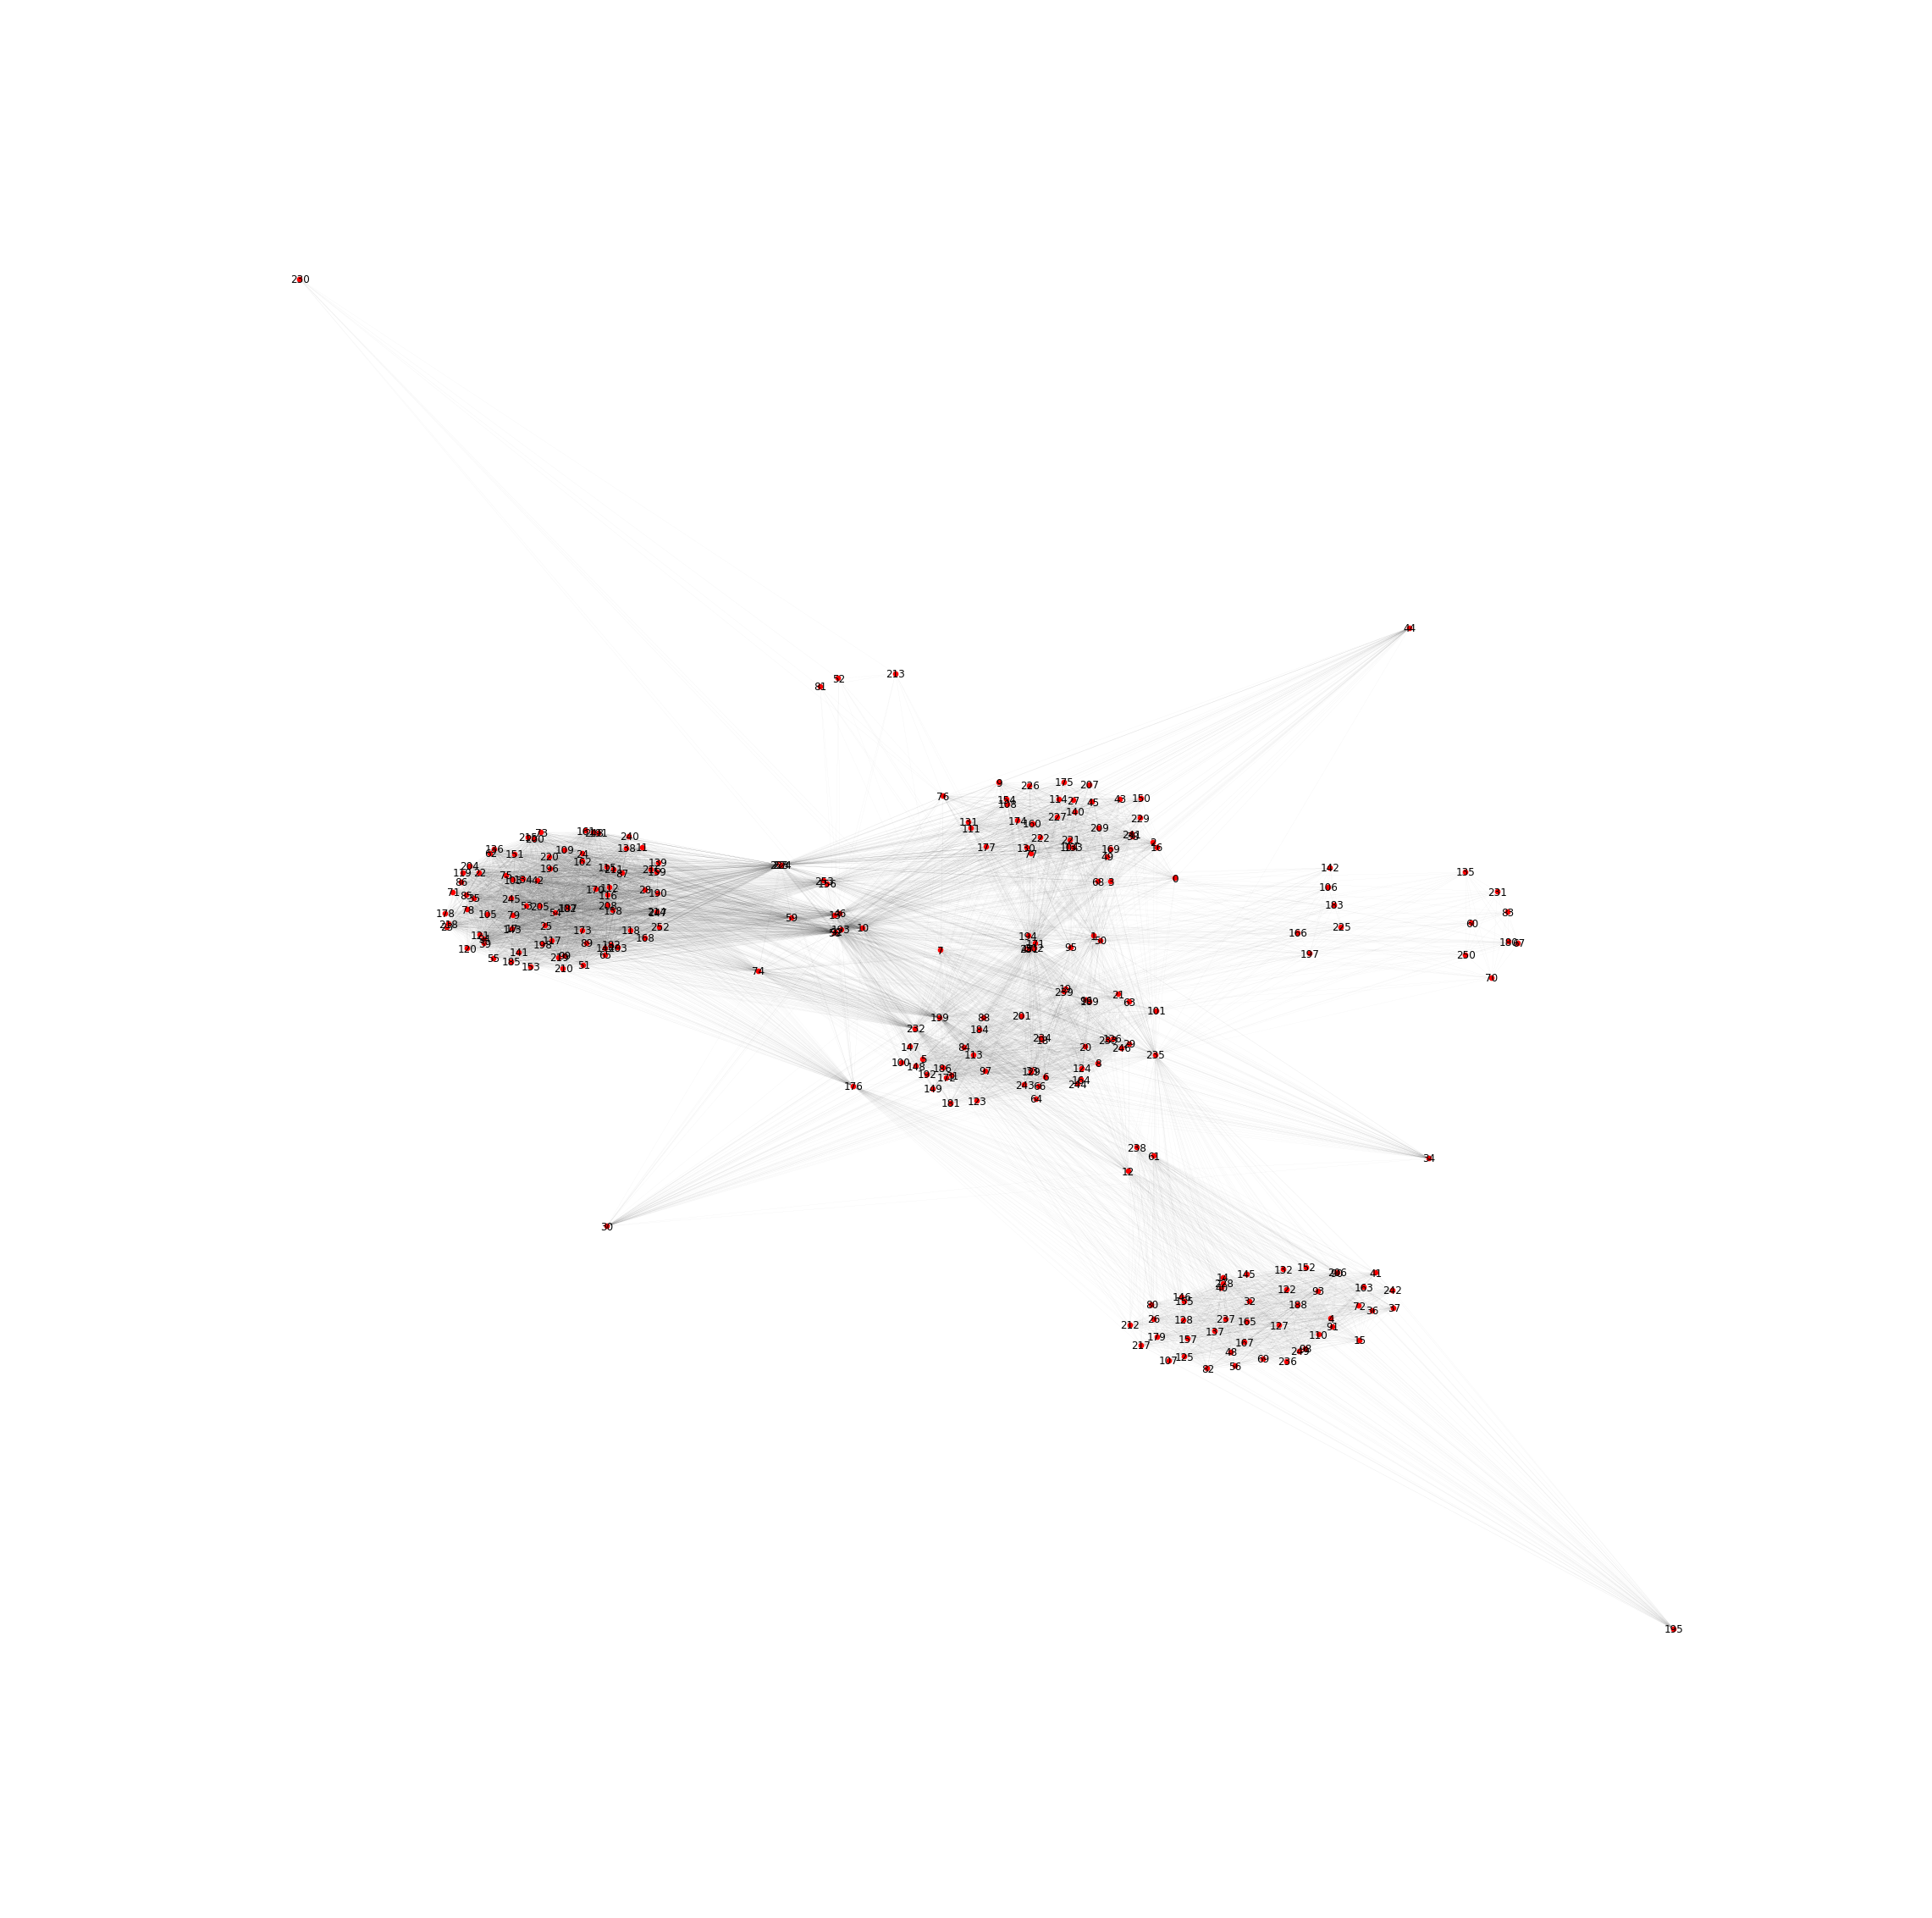

In [32]:
pos=nx.spring_layout(H, iterations=30)
plt.figure(figsize=(40,40))
nx.draw_networkx_edges(H, pos, width=.015)
nx.draw_networkx_nodes(H, pos, node_size=50)
nx.draw_networkx_labels(H, pos)
plt.axis('off')
plt.show()

##Graphing the prelude to analysis, not the thing itself

##Just as term-document matrices are the fundamental form for undertaking *text analysis*, putting data into a graph form, as in `networkx`, allows a wide range of analysis, including sophisticated *supervised* and *unsupervised* learning.

`Google`'s `Page-Rank`--the core of its search algorithm--is a graph analysis algorithm.

Intuition is that websites (nodes) referred to by other high-ranking websites (nodes) should be more highly ranked


##Black box time!


###lots of centrality measures, most built into `networkx`

We'll use a fairly sophisticated one, eigenvector centrality, built into `networks`. 

If you want to unblackbox, you're ready for a more advanced course!



In [32]:
H_centrality=nx.eigenvector_centrality(H, max_iter=30)

In [33]:
H_centrality

{'Adams.John': 0.042042617911528087,
 'Adams.Samuel': 0.082652308324596649,
 'Allen.Dr': 0.036137828617833566,
 'Appleton.Nathaniel': 0.046733890801182211,
 'Ash.Gilbert': 0.0088622466677354388,
 'Austin.Benjamin': 0.031513355025979455,
 'Austin.Samuel': 0.031513355025979455,
 'Avery.John': 0.035111625311478385,
 'Baldwin.Cyrus': 0.031513355025979455,
 'Ballard.John': 0.036137828617833566,
 'Barber.Nathaniel': 0.15749939125034759,
 'Barnard.Samuel': 0.083263395828609463,
 'Barrett.Samuel': 0.039998750675148034,
 'Bass.Henry': 0.15058746829025768,
 'Bell.William': 0.0088622466677354388,
 'Bewer.James': 0.083263395828609449,
 'Blake.Increase': 0.0088622466677354406,
 'Boit.John': 0.036137828617833566,
 'Bolter.Thomas': 0.083263395828609449,
 'Boyer.Peter': 0.031513355025979455,
 'Boynton.Richard': 0.042152575755578896,
 'Brackett.Jos': 0.031513355025979455,
 'Bradford.John': 0.042152575755578896,
 'Bradlee.David': 0.083263395828609449,
 'Bradlee.Josiah': 0.083263395828609449,
 'Bradlee.N

argh, need to sort that

In [34]:
sorted(H_centrality, key=H_centrality.get, reverse=True)[:10]  #useful syntax to know for sorting dictionaries!

['Revere.Paul',
 'Barber.Nathaniel',
 'Chase.Thomas',
 'Bass.Henry',
 'Proctor.Edward',
 'Condy.JamesFoster',
 'Grant.Moses',
 'Young.Thomas',
 'Molineux.William',
 'Urann.Thomas']

In [35]:
for name in sorted(H_centrality, key=H_centrality.get, reverse=True)[0:10]:
    print(name, H_centrality[name])

Revere.Paul 0.160046332697
Barber.Nathaniel 0.15749939125
Chase.Thomas 0.15058746829
Bass.Henry 0.15058746829
Proctor.Edward 0.148123548006
Condy.JamesFoster 0.148123548006
Grant.Moses 0.148123548006
Young.Thomas 0.128025274381
Molineux.William 0.128025274381
Urann.Thomas 0.125891367079


##Revere is our terrorist mastermind!
###Get them on a do-not fly, er, ride list!

Point *isn't* that such techniques are *always* right:

- they *do* uncover relationship

- they have *tons* of false positives